In [6]:
import pandas as pd

In [8]:
df = pd.read_csv('data/csv/dk.csv', parse_dates=['collected_at'])

In [10]:
df['americanOdds'] = (
    df['americanOdds']
    .astype(str)
    .str.replace('−', '-', regex=False)
    .str.replace(r'^\+', '', regex=True)
    .astype(int)
)

In [12]:
def american_to_prob(o):
    if o > 0:
        return 100 / (o + 100)
    else:
        return -o / (abs(o) + 100)
df['imp_prob'] = df['americanOdds'].apply(american_to_prob)

In [14]:
df.head()

,id,marketId,label,americanOdds,decimalOdds,fractionalOdds,trueOdds,outcomeType,sortOrder,tags,main,collected_at,imp_prob
0,0HC79840267N150_3,2_79840267,CLE Guardians,136,2.36,34/25,2.360000,Away,-1501,MainPointLine;SGP,True,2025-05-06 14:47:36.831000+00:00,0.423729
1,0HC79832764N150_3,2_79832764,LA Dodgers,-170,1.58,10/17,1.588235,Away,-1501,MainPointLine;SGP,True,2025-05-06 14:47:36.839000+00:00,0.629630
2,0HC79832765N150_3,2_79832765,CLE Guardians,136,2.36,34/25,2.360000,Away,-1501,MainPointLine;SGP,True,2025-05-06 14:47:36.839000+00:00,0.423729
3,0HC79832766N150_3,2_79832766,TEX Rangers,136,2.36,34/25,2.360000,Away,-1501,MainPointLine;SGP,True,2025-05-06 14:47:36.839000+00:00,0.423729
4,0HC79832807N150_3,2_79832807,PHI Phillies,140,2.40,7/5,2.400000,Away,-1501,MainPointLine;SGP,True,2025-05-06 14:47:36.839000+00:00,0.416667


In [16]:
df['sum_prob'] = df.groupby(
    ['marketId', 'collected_at']
)['imp_prob'].transform('sum')

df['fair_prob'] = df['imp_prob'] / df['sum_prob']

In [18]:
df.head()

,id,marketId,label,americanOdds,decimalOdds,fractionalOdds,trueOdds,outcomeType,sortOrder,tags,main,collected_at,imp_prob,sum_prob,fair_prob
0,0HC79840267N150_3,2_79840267,CLE Guardians,136,2.36,34/25,2.360000,Away,-1501,MainPointLine;SGP,True,2025-05-06 14:47:36.831000+00:00,0.423729,0.423729,1.000000
1,0HC79832764N150_3,2_79832764,LA Dodgers,-170,1.58,10/17,1.588235,Away,-1501,MainPointLine;SGP,True,2025-05-06 14:47:36.839000+00:00,0.629630,1.042853,0.603757
2,0HC79832765N150_3,2_79832765,CLE Guardians,136,2.36,34/25,2.360000,Away,-1501,MainPointLine;SGP,True,2025-05-06 14:47:36.839000+00:00,0.423729,1.042049,0.406630
3,0HC79832766N150_3,2_79832766,TEX Rangers,136,2.36,34/25,2.360000,Away,-1501,MainPointLine;SGP,True,2025-05-06 14:47:36.839000+00:00,0.423729,1.042049,0.406630
4,0HC79832807N150_3,2_79832807,PHI Phillies,140,2.40,7/5,2.400000,Away,-1501,MainPointLine;SGP,True,2025-05-06 14:47:36.839000+00:00,0.416667,1.040727,0.400361


In [20]:
df['collected_at'] = pd.to_datetime(df['collected_at']).dt.floor('s')

In [22]:
dk_ts = df.pivot_table(
    index='collected_at',
    columns=['marketId', 'label'],
    values='fair_prob'
).sort_index()

In [24]:
clean = dk_ts.dropna(how='all')
clean.columns = [
    f"{label} @ {marketId}"
    for marketId, label in clean.columns
]
clean = clean.round(3)
clean = clean.reset_index() 

In [26]:
dk_ts = clean
dk_ts

,collected_at,LA Dodgers @ 1_79832764,MIA Marlins @ 1_79832764,CLE Guardians @ 1_79832765,WAS Nationals @ 1_79832765,BOS Red Sox @ 1_79832766,TEX Rangers @ 1_79832766,PHI Phillies @ 1_79832807,TB Rays @ 1_79832807,NY Yankees @ 1_79832816,...,Over @ 3_79857256,Under @ 3_79857256,Over @ 3_79857281,Under @ 3_79857281,Over @ 3_79857314,Under @ 3_79857314,Over @ 3_79857338,Under @ 3_79857338,Over @ 3_79857339,Under @ 3_79857339
0,2025-05-06 14:47:36+00:00,0.7,0.3,0.517,0.483,0.478,0.522,0.526,0.474,0.496,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-05-07 19:53:02+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.511,0.489,0.489,0.511,0.511,0.489,0.483,0.517,0.483,0.517
2,2025-05-07 19:54:03+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.511,0.489,0.489,0.511,0.511,0.489,0.483,0.517,0.483,0.517


In [28]:
df_kalshi = pd.read_csv('kalshi_sports_prices.csv', parse_dates=['timestamp'])

In [30]:
df_kalshi['ks_prob'] = df_kalshi['last_price'] / 100.0
df_kalshi = df_kalshi.rename(columns={'timestamp': 'collected_at', 'market_ticker':'marketId'})
df_kalshi['collected_at'] = (
    pd.to_datetime(df_kalshi['collected_at']).dt.floor('s')
)

In [32]:
df_kalshi

,collected_at,event_ticker,yes_sub_title,marketId,yes_bid,yes_ask,no_bid,no_ask,last_price,ks_prob
0,2025-05-07 19:50:52,KXMLB-25,Arizona,KXMLB-25-ARI,2,3,97,98,3,0.03
1,2025-05-07 19:50:52,KXMLB-25,Atlanta,KXMLB-25-ATL,6,7,93,94,6,0.06
2,2025-05-07 19:50:52,KXMLB-25,Baltimore,KXMLB-25-BAL,1,2,98,99,2,0.02
3,2025-05-07 19:50:53,KXMLB-25,Boston,KXMLB-25-BOS,4,5,95,96,5,0.05
4,2025-05-07 19:50:53,KXMLB-25,Chicago C,KXMLB-25-CHC,4,6,94,96,5,0.05
...,...,...,...,...,...,...,...,...,...,...
113,2025-05-07 19:51:05,KXMLBGAME-25MAY07SFCHC,San Francisco,KXMLBGAME-25MAY07SFCHC-SF,65,68,32,35,70,0.70
114,2025-05-07 19:51:06,KXMLBGAME-25MAY07HOUMIL,Milwaukee,KXMLBGAME-25MAY07HOUMIL-MIL,0,1,99,100,1,0.01
115,2025-05-07 19:51:06,KXMLBGAME-25MAY07HOUMIL,Houston,KXMLBGAME-25MAY07HOUMIL-HOU,99,100,0,1,99,0.99
116,2025-05-07 19:51:06,KXMLBGAME-25MAY06DETCOL,Colorado,KXMLBGAME-25MAY06DETCOL-COL,37,38,62,63,38,0.38


In [34]:
ks_ts = df_kalshi.pivot_table(
    index='collected_at',
    columns='marketId',
    values='ks_prob',
    aggfunc='first'
).sort_index()

In [36]:
ks_ts

marketId,KXMLB-25-A,KXMLB-25-ARI,KXMLB-25-ATL,KXMLB-25-BAL,KXMLB-25-BOS,KXMLB-25-CHC,KXMLB-25-CIN,KXMLB-25-CLE,KXMLB-25-COL,KXMLB-25-CWS,...,KXMLBNLEAST-25-ATL,KXMLBNLEAST-25-MIA,KXMLBNLEAST-25-NYM,KXMLBNLEAST-25-PHI,KXMLBNLEAST-25-WSH,KXMLBNLWEST-25-AZ,KXMLBNLWEST-25-COL,KXMLBNLWEST-25-LAD,KXMLBNLWEST-25-SD,KXMLBNLWEST-25-SF
collected_at,,,,,,,,,,,,,,,,,,,,,
2025-05-07 19:50:52,NaN,0.03,0.06,0.02,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-05-07 19:50:53,NaN,NaN,NaN,NaN,0.05,0.05,0.02,0.02,0.01,0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-05-07 19:50:54,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-05-07 19:50:55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-05-07 19:50:56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-05-07 19:50:57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-05-07 19:50:58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-05-07 19:50:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.18,NaN,0.59,0.31,NaN,0.02,0.01,0.78,0.18,0.07
2025-05-07 19:51:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.01,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN


In [38]:
dk_long = (
    dk_ts
    .reset_index()                     
    .melt(
        id_vars='collected_at',
        var_name='market_col',        
        value_name='dk_prob'
    )
)

In [40]:
dk_long['yes_sub_title'] = (
    dk_long['market_col']
    .str.split(r'\s*@\s*')            # split on " @ "
    .str[0]                           # take the left part: "LA Dodgers", etc.
    .str.strip()
)

In [42]:
dk_long

,collected_at,market_col,dk_prob,yes_sub_title
0,2025-05-06 14:47:36+00:00,index,0.000,index
1,2025-05-07 19:53:02+00:00,index,1.000,index
2,2025-05-07 19:54:03+00:00,index,2.000,index
3,2025-05-06 14:47:36+00:00,LA Dodgers @ 1_79832764,0.700,LA Dodgers
4,2025-05-07 19:53:02+00:00,LA Dodgers @ 1_79832764,NaN,LA Dodgers
...,...,...,...,...
598,2025-05-07 19:53:02+00:00,Over @ 3_79857339,0.483,Over
599,2025-05-07 19:54:03+00:00,Over @ 3_79857339,0.483,Over
600,2025-05-06 14:47:36+00:00,Under @ 3_79857339,NaN,Under
601,2025-05-07 19:53:02+00:00,Under @ 3_79857339,0.517,Under


In [44]:
# All unique subtitles in DK data
dk_titles = dk_long['yes_sub_title'].unique()
print("DK subtitles:", dk_titles)

# All unique subtitles Kalshi data
ks_titles = df_kalshi['yes_sub_title'].unique()
print("Kalshi subtitles:", ks_titles)

DK subtitles: ['index' 'LA Dodgers' 'MIA Marlins' 'CLE Guardians' 'WAS Nationals'
 'BOS Red Sox' 'TEX Rangers' 'PHI Phillies' 'TB Rays' 'NY Yankees'
 'SD Padres' 'ATL Braves' 'CIN Reds' 'CHI Cubs' 'SF Giants' 'BAL Orioles'
 'MIN Twins' 'CHI White Sox' 'KC Royals' 'HOU Astros' 'MIL Brewers'
 'PIT Pirates' 'STL Cardinals' 'COL Rockies' 'DET Tigers' 'LA Angels'
 'TOR Blue Jays' 'ARI Diamondbacks' 'NY Mets' 'Athletics' 'SEA Mariners'
 'Over' 'Under']
Kalshi subtitles: ['Arizona' 'Atlanta' 'Baltimore' 'Boston' 'Chicago C' 'Chicago WS'
 'Cincinnati' 'Cleveland' 'Colorado' 'Detroit' 'Miami' 'Houston'
 'Kansas City' 'Los Angeles A' 'Los Angeles D' 'Milwaukee' 'Minnesota'
 'New York M' 'New York Y' "A's" 'Philadelphia' 'Pittsburgh' 'San Diego'
 'San Francisco' 'Seattle' 'St. Louis' 'Tampa Bay' 'Texas' 'Toronto'
 'Washington' 'Chicago W']


In [46]:
dk_to_ks = {
    # MLB teams
    'LA Dodgers'        : 'Los Angeles D',
    'MIA Marlins'       : 'Miami',
    'CLE Guardians'     : 'Cleveland',
    'WAS Nationals'     : 'Washington',
    'BOS Red Sox'       : 'Boston',
    'TEX Rangers'       : 'Texas',
    'PHI Phillies'      : 'Philadelphia',
    'TB Rays'           : 'Tampa Bay',
    'NY Yankees'        : 'New York Y',
    'SD Padres'         : 'San Diego',
    'ATL Braves'        : 'Atlanta',
    'CIN Reds'          : 'Cincinnati',
    'CHI Cubs'          : 'Chicago C',
    'CHI White Sox'     : 'Chicago WS',
    'SF Giants'         : 'San Francisco',
    'BAL Orioles'       : 'Baltimore',
    'MIN Twins'         : 'Minnesota',
    'KC Royals'         : 'Kansas City',
    'HOU Astros'        : 'Houston',
    'MIL Brewers'       : 'Milwaukee',
    'PIT Pirates'       : 'Pittsburgh',
    'STL Cardinals'     : 'St. Louis',
    'COL Rockies'       : 'Colorado',
    'DET Tigers'        : 'Detroit',
    'LA Angels'         : 'Los Angeles A',
    'TOR Blue Jays'     : 'Toronto',
    'ARI Diamondbacks'  : 'Arizona',
    'NY Mets'           : 'New York M',
    "Athletics"         : "A's",       # Oakland A’s in Kalshi
    # anything you don’t care to join—map to None or leave out
    'index'             : None,
    'Over'              : None,
    'Under'             : None,
}

In [48]:
dk_long['yes_sub_title_norm'] = dk_long['yes_sub_title'].map(dk_to_ks)

In [50]:
dk_for_merge = dk_long.dropna(subset=['yes_sub_title_norm'])

In [52]:
merged = pd.merge(
    dk_for_merge,
    df_kalshi,
    left_on='yes_sub_title_norm',
    right_on='yes_sub_title',
    how='inner'
)

In [54]:
merged

,collected_at_x,market_col,dk_prob,yes_sub_title_x,yes_sub_title_norm,collected_at_y,event_ticker,yes_sub_title_y,marketId,yes_bid,yes_ask,no_bid,no_ask,last_price,ks_prob
0,2025-05-06 14:47:36+00:00,LA Dodgers @ 1_79832764,0.700,LA Dodgers,Los Angeles D,2025-05-07 19:50:54,KXMLB-25,Los Angeles D,KXMLB-25-LAD,25,27,73,75,25,0.25
1,2025-05-06 14:47:36+00:00,LA Dodgers @ 1_79832764,0.700,LA Dodgers,Los Angeles D,2025-05-07 19:50:57,KXMLBNL-25,Los Angeles D,KXMLBNL-25-LAD,36,39,61,64,39,0.39
2,2025-05-06 14:47:36+00:00,LA Dodgers @ 1_79832764,0.700,LA Dodgers,Los Angeles D,2025-05-07 19:50:59,KXMLBNLWEST-25,Los Angeles D,KXMLBNLWEST-25-LAD,78,82,18,22,78,0.78
3,2025-05-06 14:47:36+00:00,LA Dodgers @ 1_79832764,0.700,LA Dodgers,Los Angeles D,2025-05-07 19:51:05,KXMLBGAME-25MAY07LADMIA,Los Angeles D,KXMLBGAME-25MAY07LADMIA-LAD,67,68,32,33,68,0.68
4,2025-05-07 19:53:02+00:00,LA Dodgers @ 1_79832764,NaN,LA Dodgers,Los Angeles D,2025-05-07 19:50:54,KXMLB-25,Los Angeles D,KXMLB-25-LAD,25,27,73,75,25,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,2025-05-07 19:53:02+00:00,Athletics @ 2_79856233,1.000,Athletics,A's,2025-05-07 19:51:05,KXMLBGAME-25MAY07SEAATH,A's,KXMLBGAME-25MAY07SEAATH-ATH,60,64,36,40,65,0.65
1463,2025-05-07 19:54:03+00:00,Athletics @ 2_79856233,0.541,Athletics,A's,2025-05-07 19:50:54,KXMLB-25,A's,KXMLB-25-A,0,1,99,100,1,0.01
1464,2025-05-07 19:54:03+00:00,Athletics @ 2_79856233,0.541,Athletics,A's,2025-05-07 19:50:58,KXMLBAL-25,A's,KXMLBAL-25-A,1,2,98,99,1,0.01
1465,2025-05-07 19:54:03+00:00,Athletics @ 2_79856233,0.541,Athletics,A's,2025-05-07 19:51:01,KXMLBALWEST-25,A's,KXMLBALWEST-25-ATH,4,7,93,96,13,0.13


In [58]:
clean = (
    merged
    [['collected_at_x','yes_sub_title_norm','dk_prob','ks_prob']]
    .rename(columns={
        'collected_at':'time_collected',
        'yes_sub_title_norm':'team',
        'dk_prob':'dk_prob',
        'ks_prob':'ks_prob'
    })
)
clean.head(20)

,collected_at_x,team,dk_prob,ks_prob
0,2025-05-06 14:47:36+00:00,Los Angeles D,0.7,0.25
1,2025-05-06 14:47:36+00:00,Los Angeles D,0.7,0.39
2,2025-05-06 14:47:36+00:00,Los Angeles D,0.7,0.78
3,2025-05-06 14:47:36+00:00,Los Angeles D,0.7,0.68
4,2025-05-07 19:53:02+00:00,Los Angeles D,NaN,0.25
5,2025-05-07 19:53:02+00:00,Los Angeles D,NaN,0.39
6,2025-05-07 19:53:02+00:00,Los Angeles D,NaN,0.78
7,2025-05-07 19:53:02+00:00,Los Angeles D,NaN,0.68
8,2025-05-07 19:54:03+00:00,Los Angeles D,NaN,0.25
9,2025-05-07 19:54:03+00:00,Los Angeles D,NaN,0.39


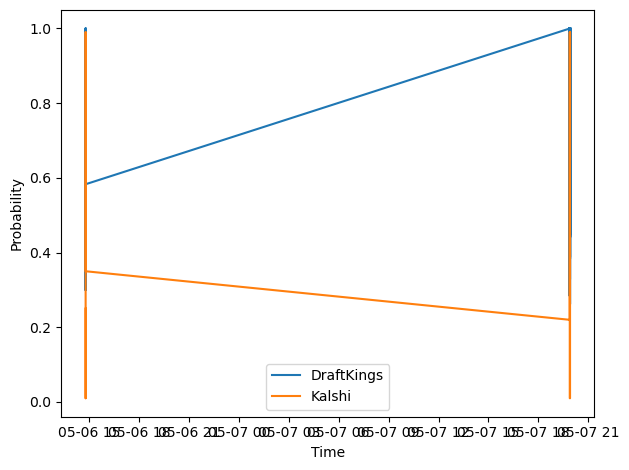

In [60]:
import matplotlib.pyplot as plt

# 1) Sort your merged table by time
df = merged.sort_values('collected_at_x')

# 2) Plot both series on the same axes
fig, ax = plt.subplots()
ax.plot(df['collected_at_x'], df['dk_prob'], label='DraftKings')
ax.plot(df['collected_at_x'], df['ks_prob'], label='Kalshi')

# 3) Label and show
ax.set_xlabel('Time')
ax.set_ylabel('Probability')
ax.legend()
plt.tight_layout()
plt.show()


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

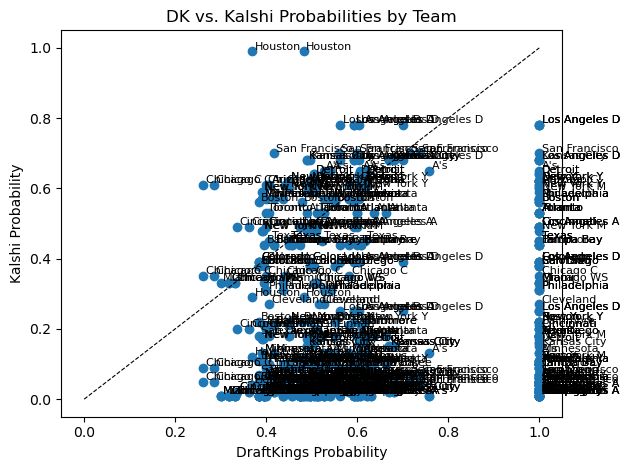

In [62]:
import matplotlib.pyplot as plt

# Assume `clean` has columns: collected_at, yes_sub_title_norm, dk_prob, ks_prob
scatter_df = clean.copy()

fig, ax = plt.subplots()
ax.scatter(scatter_df['dk_prob'], scatter_df['ks_prob'])

# Optional: annotate each point with the team
for _, row in scatter_df.iterrows():
    ax.text(row['dk_prob']+0.005, row['ks_prob']+0.005, row['team'],
            fontsize=8)

ax.set_xlabel('DraftKings Probability')
ax.set_ylabel('Kalshi Probability')
ax.set_title('DK vs. Kalshi Probabilities by Team')
ax.plot([0,1],[0,1],'k--',linewidth=0.8)   # 45° line for parity
plt.tight_layout()
plt.show()


/var/folders/_8/f94g8v_16g3_w38rwm1nm1yw0000gn/T/ipykernel_56076/842079425.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20', len(teams))


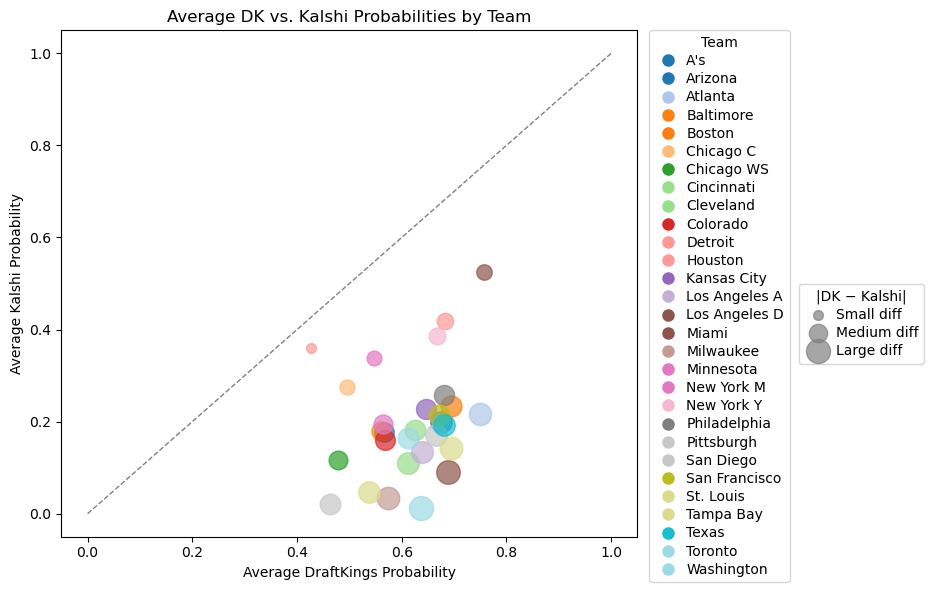

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# 1) Build a one‐row‐per‐team summary
cleans = clean[['collected_at_x','team','dk_prob','ks_prob']].rename(columns={
    'collected_at_x':'Time',
    'team':'Team',
    'dk_prob':'DK Probability',
    'ks_prob':'Kalshi Probability'
})
df_team = cleans.groupby('Team')[['DK Probability','Kalshi Probability']].mean().reset_index()

# 2) Compute a marker‐size proportional to the absolute difference
df_team['diff'] = np.abs(df_team['DK Probability'] - df_team['Kalshi Probability'])
min_s, max_s = 50, 300
df_team['size'] = np.interp(df_team['diff'],
                            [df_team['diff'].min(), df_team['diff'].max()],
                            [min_s, max_s])

# 3) Assign each team a distinct color
teams = df_team['Team'].tolist()
cmap = plt.cm.get_cmap('tab20', len(teams))
df_team['color'] = [cmap(i) for i in range(len(teams))]

# 4) Make the scatter
fig, ax = plt.subplots(figsize=(10,6))
for _, row in df_team.iterrows():
    ax.scatter(row['DK Probability'], row['Kalshi Probability'],
               s=row['size'], color=row['color'], alpha=0.7)

# 5) Add a 45° parity line
ax.plot([0,1],[0,1], '--', color='gray', linewidth=1)

# 7) Legend for sizes (|DK–Kalshi| difference)
size_values = [min_s, (min_s+max_s)/2, max_s]
size_labels = ['Small diff', 'Medium diff', 'Large diff']
size_handles = [plt.scatter([],[], s=s, color='gray', alpha=0.7) for s in size_values]
ax.legend(size_handles, size_labels, title='|DK−Kalshi|',
          bbox_to_anchor=(1.02,0.5), loc='upper left', borderaxespad=0.)

import matplotlib.lines as mlines

# --- after your scatter & parity line ---

# 1) Build the "team color" legend
team_handles = []
team_labels  = []
for _, row in df_team.iterrows():
    h = mlines.Line2D([], [], 
                      marker='o', 
                      color=row['color'], 
                      linestyle='',
                      markersize=8)
    team_handles.append(h)
    team_labels.append(row['Team'])

legend_teams = ax.legend(
    team_handles, team_labels,
    title='Team',
    bbox_to_anchor=(1.02, 1.0), loc='upper left',
    borderaxespad=0.,
    labelspacing=0.3, handletextpad=0.3
)
# add it back so it isn't overwritten
ax.add_artist(legend_teams)


# 2) Build the "size difference" legend
size_values = [min_s, (min_s+max_s)/2, max_s]
size_labels = ['Small diff', 'Medium diff', 'Large diff']
size_handles = [
    plt.scatter([], [], s=s, color='gray', alpha=0.7)
    for s in size_values
]

legend_sizes = ax.legend(
    size_handles, size_labels,
    title='|DK − Kalshi|',
    bbox_to_anchor=(1.28, 0.5), loc='upper left',
    borderaxespad=0.,
    labelspacing=0.3, handletextpad=0.3
)
# no need to add_artists again — this is the second legend

ax.set_xlabel('Average DraftKings Probability')
ax.set_ylabel('Average Kalshi Probability')
ax.set_title('Average DK vs. Kalshi Probabilities by Team')
plt.tight_layout()
plt.show()
